<a href="https://colab.research.google.com/github/andersontan1998/448_Artifical_Intelligence/blob/main/Anderson_Tan_Assignment_3.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Global Internet Usage

### By: Anderson Tan

## Abstract

A majority of the United States population is addicted to the Internet in some sort of way. It is a common complaint nowadays with teenagers becoming too addicted to the internet and have diffculties disconnecting. Online services like Facebook, Youtube, Instagram, Twitter, and one of the most well-liked apps today: TikTok, are called "masters of manipulation - making products so good that people cannot stop using them."

The most popular scenario of a family gathering around a dinner table, ready to spend time together, with laughter and a bit of banter and then suddenly comes a person checking their phone constantly for updates on social media. The reality is that the internet has become an essential to everyday life that that this topic has deemed interesting.

The regression dataset below displays the total amount of internet used worldwide. The objective is to determine the relationship between the income per person in relation to the internet use rate. 

Speaking of internet addiction, this also applies to gaming as well.
The second dataset revolves around an all time addicting multiplayer game called League of Legends. To some extent, this game has been a grind for most teenagers because of its mass popularity and its ability to bring players into Esports' Prize Pool Tournaments.

The objective here is to use the K-Nearest Neighbors algorithm to determine if a "champion" can be classified as a tank, which often has a high amount of defense, with just the amount of Health Points they have.

## Section 1: Regression Dataset Prep

There are several columns to this dataset. For each country, there is data about the average income per person, the internet use rate, and the urban rate. More details about each column is described below.

The dataset, **"head"** of the data, is loaded with pandas below:

In [160]:
import pandas as pd

# Read data from gapminder_internet.csv
gapminder_internet = pd.read_csv("./gapminder_internet.csv")
gapminder_internet = gapminder_internet.dropna()

# Use pandas to load your dataset and output the first 15 rows
gapminder_internet.head(15)

,country,incomeperperson,internetuserate,urbanrate
1,Albania,1914.996551,44.989947,46.72
2,Algeria,2231.993335,12.500073,65.22
3,Andorra,21943.339900,81.000000,88.92
4,Angola,1381.004268,9.999954,56.70
5,Antigua and Barbuda,11894.464070,80.645455,30.46
6,Argentina,10749.419240,36.000335,92.00
7,Armenia,1326.741757,44.001025,63.86
9,Australia,25249.986060,75.895654,88.74
10,Austria,26692.984110,72.731576,67.16
11,Azerbaijan,2344.896916,46.679702,51.92


More information about these columns from the dataset above: 

These columns will be used later for Linear Regression 

1. country - the unique identifier
2. average income per person - Gross Domestic Product (GPD) per capita in constant 2000 US
3. internet use rate - internet users (per 100 people) - those with access to the worldwide network
4. urban rate - percentage of the total population that is urbanized - defined by national statistical offices (calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects)


In [204]:
# pandas to load dataset and output the last 15 rows which includes the U.S.
gapminder_internet.tail(15)

,country,incomeperperson,internetuserate,urbanrate
196,Turkey,5348.597192,39.820178,68.68
197,Turkmenistan,2062.125152,2.199998,48.62
199,Uganda,377.421113,12.500255,12.98
200,Ukraine,1036.830725,44.585355,67.98
201,United Arab Emirates,21087.394120,77.996781,77.88
202,United Kingdom,28033.489280,84.731705,89.94
203,United States,37491.179520,74.247572,81.70
204,Uruguay,9106.327234,47.867469,92.30
205,Uzbekistan,952.827261,19.445021,36.82
206,Vanuatu,1543.956457,7.988367,24.76


In [162]:
# Use pandas to clean out data cells that have invalid values for columns of interest

# Income per person x Internet use rate
income_internet = gapminder_internet[["incomeperperson", "internetuserate"]]
income_internet.head(15)


,incomeperperson,internetuserate
1,1914.996551,44.989947
2,2231.993335,12.500073
3,21943.339900,81.000000
4,1381.004268,9.999954
5,11894.464070,80.645455
6,10749.419240,36.000335
7,1326.741757,44.001025
9,25249.986060,75.895654
10,26692.984110,72.731576
11,2344.896916,46.679702


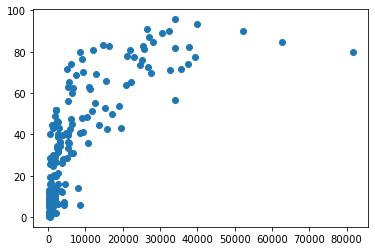

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(gapminder_internet['incomeperperson'],gapminder_internet['internetuserate'])

In [164]:
#Urban rate x Internet use rate

urbanrate_internet = gapminder_internet[["urbanrate", "internetuserate"]]
urbanrate_internet.head(15)

,urbanrate,internetuserate
1,46.72,44.989947
2,65.22,12.500073
3,88.92,81.000000
4,56.70,9.999954
5,30.46,80.645455
6,92.00,36.000335
7,63.86,44.001025
9,88.74,75.895654
10,67.16,72.731576
11,51.92,46.679702


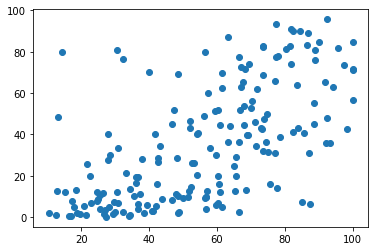

In [165]:
plt.scatter(gapminder_internet['urbanrate'],gapminder_internet['internetuserate'])

## Section 2: Linear Regression

In [166]:
# Use pandas to extract features and prediction sets from our dataframe

import numpy as np

X = gapminder_internet[['incomeperperson']]
y = gapminder_internet['internetuserate']


In [167]:
# Use sklearn to split our dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [168]:
len(X_train)

145

In [169]:
len(X_test)

37

In [170]:
# Use sklearn to create and Linear Regressor and fit our data to it

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

reg.coef_

array([0.00157384])

In [171]:
# experiment with the regressor

reg.predict(X_test)

array([25.15222937, 64.61115237, 28.97349247, 23.56136449, 64.3890213 ,
       32.27636129, 30.75660836, 22.76408806, 23.28101539, 57.13598933,
       23.5310061 , 24.40096554, 22.88418362, 25.03069674, 29.67522935,
       23.10560432, 76.02513393, 23.03545611, 23.3190383 , 23.45787233,
       84.46745129, 31.30150105, 24.77423665, 22.89057091, 49.50149788,
       36.15797796, 37.14865579, 53.49602149, 30.7606462 , 23.7383427 ,
       26.8698202 , 25.70995738, 23.75952732, 26.09835368, 23.77207293,
       62.85218323, 24.77801008])

In [172]:
y_test

150    19.801681
10     72.731576
53     39.531274
210    12.349750
136    90.703555
52     47.280436
123    28.731884
41      0.720009
211    10.124986
3      81.000000
45      2.599974
87      9.900039
141     0.829997
206     7.988367
47     15.899970
212    11.500415
85     95.638113
28      1.400061
189    11.000055
142    28.430033
94     77.638535
207    35.850437
4       9.999954
115     2.259976
26     49.989975
171    40.772851
15     70.028599
12     42.984580
116    56.300034
208    27.851822
190    21.200072
55     26.740025
89      2.471948
129    51.958038
149     1.280050
32     81.338393
152    24.999946
Name: internetuserate, dtype: float64

In [173]:
reg.score(X_test, y_test)

0.6678993435009716

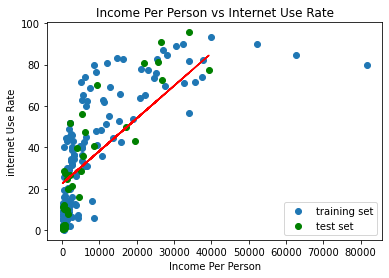

In [174]:
# Use matplotlib (or other visualization lib) to create a scatter plot and the regression to create a regression line

y_pred = reg.predict(X_test)

plt.scatter(X_train, y_train, label="training set")
plt.scatter(X_test, y_test, color="green", label="test set")
plt.legend()

plt.plot(X_test, y_pred, color="red")
plt.title("Income Per Person vs Internet Use Rate")
plt.xlabel("Income Per Person")
plt.ylabel("internet Use Rate")

plt.show()

In [175]:
# Use linear regression model to report accuracy/error rate on the test set

from sklearn import metrics

mean_abs_err = metrics.mean_absolute_error(y_test, y_pred)
mean_sq_err = metrics.mean_squared_error(y_test,y_pred)
sqrt_mean_sq_err = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mean_abs_err)
print('Mean Squared Error:', mean_sq_err)
print('Root Mean Squared Error:', sqrt_mean_sq_err)

print('Score:', reg.score(X_test, y_test))


Mean Absolute Error: 13.947941616781872
Mean Squared Error: 266.4084930730352
Root Mean Squared Error: 16.32202478472065
Score: 0.6678993435009716


In [176]:
# Potentially perform further analysis, one good angle is k-fold cross validation or trying a different regression

# Using sklearn to perform a k-fold cross validation on the data
from sklearn.model_selection import cross_val_score

# k-fold cross validation (5-fold)
scores = cross_val_score(reg, X, y, cv=5)

print('5-fold Cross Validation:', scores)

5-fold Cross Validation: [0.5294269  0.56710148 0.21937927 0.53699443 0.68921086]


## Section 3: Classification Dataset Prep

The dataset of this topic is very large consisting of about 40 columns. This data is a collection of every League of Legends champion and their statistics including attack damage, mana regeneration, total mana, party type, etc...

However, the columns this section will focus on consist of the id, tags, info.defense, and stats.hp of every champion where:

1. id - the id and name of the champion
2. tags - descriptive role
3. info.defense - defense of the champion
4. stats.hp - the starting health point at level 1

Cleaning the table process is shown below


In [177]:
import pandas as pd
import numpy as np

# Read data from riot_champion.csv
riot_champion = pd.read_csv('riot_champion.csv')
riot_champion = riot_champion.dropna()

# Use pandas to load your dataset and output the first 15 rows
riot_champion.head(15)

,Unnamed: 0,version,id,key,name,title,blurb,tags,partype,info.attack,...,stats.hpregen,stats.hpregenperlevel,stats.mpregen,stats.mpregenperlevel,stats.crit,stats.critperlevel,stats.attackdamage,stats.attackdamageperlevel,stats.attackspeedperlevel,stats.attackspeed
0,0,10.6.1,Aatrox,266,Aatrox,the Darkin Blade,Once honored defenders of Shurima against the ...,"['Fighter', 'Tank']",Blood Well,8,...,3.00,1.00,0.000,0.000,0,0,60.000,5.000,2.500,0.651
1,0,10.6.1,Ahri,103,Ahri,the Nine-Tailed Fox,Innately connected to the latent power of Rune...,"['Mage', 'Assassin']",Mana,3,...,6.50,0.60,8.000,0.800,0,0,53.040,3.000,2.000,0.668
2,0,10.6.1,Akali,84,Akali,the Rogue Assassin,Abandoning the Kinkou Order and her title of t...,['Assassin'],Energy,5,...,8.00,0.50,50.000,0.000,0,0,62.400,3.300,3.200,0.625
3,0,10.6.1,Alistar,12,Alistar,the Minotaur,Always a mighty warrior with a fearsome reputa...,"['Tank', 'Support']",Mana,6,...,8.50,0.85,8.500,0.800,0,0,62.000,3.750,2.125,0.625
4,0,10.6.1,Amumu,32,Amumu,the Sad Mummy,Legend claims that Amumu is a lonely and melan...,"['Tank', 'Mage']",Mana,2,...,9.00,0.85,7.382,0.525,0,0,53.380,3.800,2.180,0.736
5,0,10.6.1,Anivia,34,Anivia,the Cryophoenix,Anivia is a benevolent winged spirit who endur...,"['Mage', 'Support']",Mana,1,...,5.50,0.55,8.000,0.800,0,0,51.376,3.200,1.680,0.625
6,0,10.6.1,Annie,1,Annie,the Dark Child,"Dangerous, yet disarmingly precocious, Annie i...",['Mage'],Mana,2,...,5.50,0.55,8.000,0.800,0,0,50.410,2.625,1.360,0.579
7,0,10.6.1,Aphelios,523,Aphelios,the Weapon of the Faithful,Emerging from moonlight's shadow with weapons ...,['Marksman'],Mana,6,...,3.25,0.55,6.500,0.400,0,0,57.000,2.200,2.100,0.640
8,0,10.6.1,Ashe,22,Ashe,the Frost Archer,"Iceborn warmother of the Avarosan tribe, Ashe ...","['Marksman', 'Support']",Mana,7,...,3.50,0.55,6.972,0.400,0,0,61.000,2.960,3.330,0.658
9,0,10.6.1,AurelionSol,136,Aurelion Sol,The Star Forger,Aurelion Sol once graced the vast emptiness of...,['Mage'],Mana,2,...,7.00,0.60,6.000,0.800,0,0,57.000,3.200,1.360,0.625


In [189]:
#cleaning the dataset

cleaned_table = riot_champion[["id", "tags", "info.defense", "stats.hp"]]
cleaned_table.head(15)


,id,tags,info.defense,stats.hp
0,Aatrox,"['Fighter', 'Tank']",4,580.00
1,Ahri,"['Mage', 'Assassin']",4,526.00
2,Akali,['Assassin'],3,575.00
3,Alistar,"['Tank', 'Support']",9,600.00
4,Amumu,"['Tank', 'Mage']",6,613.12
5,Anivia,"['Mage', 'Support']",4,480.00
6,Annie,['Mage'],3,524.00
7,Aphelios,['Marksman'],2,500.00
8,Ashe,"['Marksman', 'Support']",3,539.00
9,AurelionSol,['Mage'],3,575.00


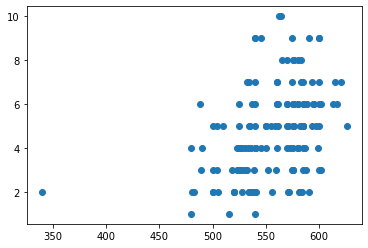

In [179]:
plt.scatter(riot_champion['stats.hp'],riot_champion['info.defense'])

## Section 4: Classification

In [180]:
# Use sklearn to split our dataset
from sklearn.model_selection import train_test_split

X = riot_champion[['stats.hp']]
y = riot_champion['info.defense']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [181]:
len(X_train)

118

In [182]:
len(X_test)

30

In [183]:
# Initialize a MLP Classifier with your choice of parameters
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

In [184]:
# Fit the network, print the trained weights, and try sample data
knn.fit(X_train, y_train)

knn.predict(X_test)

array([4, 2, 2, 7, 6, 2, 5, 3, 4, 2, 6, 3, 3, 6, 3, 2, 6, 6, 2, 4, 3, 1,
       3, 3, 3, 2, 2, 2, 3, 5], dtype=int64)

In [185]:
y_test

37     6
38     6
23     7
4      6
91     4
27     2
131    5
36     5
82     6
127    3
53     3
17     3
74     6
77     5
83     5
124    2
8      3
73     5
50     7
146    7
94     5
34     5
3      9
66     5
96     5
5      4
60     2
100    2
11     4
24     3
Name: info.defense, dtype: int64

In [186]:
# Report on the accuracy of the Test set for your classifier
knn.score(X_test, y_test)

0.2

In [199]:
# Just as in Section 2, perform more analysis, try different neural network architectures or ways of splitting the data
# Performing k-fold cross validation

from sklearn.model_selection import cross_val_score

# k-fold cross validation (2-fold)
kscores = cross_val_score(knn, X, y, cv=2)

print('2-fold Cross Validation:', kscores)

2-fold Cross Validation: [0.16216216 0.13513514]


## Conclusions

I used this assignment as a way to evaluate the internet use rate with relation to the urban rate and the income per person worldwide. The second dataset is used to determine if a "champion" can be classified as a tank, which often has a high amount of defense, with just the amount of HP they have.

Based on these two topics, I have used sklearn to split both datasets into training and test sets. This assignment uses 
regression and classification to identify the relationship between the data as well as making predictions.

Key findings from Section 2 and Section 4 is as follows: 
    
- Accuracy of the linear regression ~66.79%
- Accuracy of the K-Nearest Neighbors classifier ~20.00%

I found this assignment and datasets very interesting. Seeing the data visually using matplotlib libraries to create scatter plots was a great way to see the relationship between two variables. There were so many tools and documentations from sklearn that can be used to evaluate the datasets. 

The accuracy of the internet usage dataset is only about 66 percent. This is probably because there is very little correlation between the internet use rate and the income per person. There can only be so much internet one can use regardless of how much they make. If it was the relationship between electricity and the income per person, then there might be a better correlation.

The accuracy of the League of Legends champions dataset is very low to about 20 percent. This dataset seems to be 'fixed' so performing regression and classification was not the best idea. There would be a better prediction and better accuracy if the dataset topic was better. 

If I had more time to analyze the data, I would have shown more of what these datasets could offer. Either way, it was very fascinating to perform regression and classification on these two sets of data. 